<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/RFEVC20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [21]:
Cl = '/content/cs-longia.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [22]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-5.366667,35

In [23]:
X = data.loc[:, data.columns != 'Cs_longia']
Y = data.Cs_longia

In [24]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,95,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-

In [25]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
249    1
250    1
251    1
252    1
253    1
Name: Cs_longia, Length: 254, dtype: int64

In [76]:
def tp(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)    

In [27]:
 from sklearn.feature_selection import SelectFromModel,RFECV
 from sklearn.model_selection import StratifiedKFold

# app:95%///test:5% 

# xgboost

In [28]:
rfecv1= RFECV(XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),cv=StratifiedKFold(20))
rfecv1.fit(X,Y)
# check the support
rfecv1.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True,

In [32]:
# name wise features and count
feature_selected1 =  X.columns[rfecv1.get_support()]
feature_selected1

Index(['Ovins', 'VarT_Cy_IRM', 'Min_IRM', 'Moy_TempJ', 'Amp3_TempJ',
       'Min_TempJ', 'Max_TempJ', 'Ph1_TempJ', 'Ph2_TempJ', 'Ph3_TempJ',
       'Amp2_TempN', 'Max_TempN', 'Amp2_NDVI', 'VarT_ann_NDVI',
       'VarT_tri_NDVI', 'Max_NDVI', 'Ph1_NDVI', 'Ph2_NDVI', 'Var_NDVI',
       'Moy_EVI', 'Amp1_EVI', 'VarT_tri_EVI', 'VarT_cy_EVI', 'Var_EVI',
       'Substratum', 'Prob_R', 'ProfAbs_Sub', 'Sol_Carbone_stock', 'Geom_Shan',
       'Geom_unif', 'IPT_Moy', 'IPT_sd', 'IR_Moy', 'Bio_Tj_Moy', 'Bio_Saison',
       'Bio_Tint', 'Bio_Pre_Saison', 'Bio_Pre_Qhum', 'Prec_Juill', 'Rad_Juin',
       'Tmax_Fev', 'Tmax_Avril', 'Tmax_Mai', 'Vap_Oct', 'Vent_Mars',
       'Vent_Juin', 'Vent_Aout', 'Vent_Dec'],
      dtype='object')

In [33]:
 x_rfe1=X[feature_selected1]

In [34]:
 x_rfe1

,Ovins,VarT_Cy_IRM,Min_IRM,Moy_TempJ,Amp3_TempJ,Min_TempJ,Max_TempJ,Ph1_TempJ,Ph2_TempJ,Ph3_TempJ,Amp2_TempN,Max_TempN,Amp2_NDVI,VarT_ann_NDVI,VarT_tri_NDVI,Max_NDVI,Ph1_NDVI,Ph2_NDVI,Var_NDVI,Moy_EVI,Amp1_EVI,VarT_tri_EVI,VarT_cy_EVI,Var_EVI,Substratum,Prob_R,ProfAbs_Sub,Sol_Carbone_stock,Geom_Shan,Geom_unif,IPT_Moy,IPT_sd,IR_Moy,Bio_Tj_Moy,Bio_Saison,Bio_Tint,Bio_Pre_Saison,Bio_Pre_Qhum,Prec_Juill,Rad_Juin,Tmax_Fev,Tmax_Avril,Tmax_Mai,Vap_Oct,Vent_Mars,Vent_Juin,Vent_Aout,Vent_Dec
0,0.000000,49,2690,14905,7,14721,15012,672,347,203,44,14561,4,2,0,1113,953,208,7,2906,13,1,13,1,200,33,4143,11.916667,0.482578,0.579282,0.375000,1.531569,1.968750,7.125000,172.263782,12.000000,105.140599,22,1,25088,21.799999,22.600000,23.200001,2.02,6.1,7.1,7.2,4.9
1,0.034352,73,3350,15360,31,14941,15609,643,336,88,55,14705,2,13,0,1090,137,240,1,2596,34,0,15,0,199,20,1828,4.916667,0.000000,1.000000,-0.281250,1.125434,1.375000,9.816667,271.167506,17.700001,77.394709,18,0,24129,22.600000,24.600000,25.500000,1.95,4.8,6.4,5.9,3.8
2,0.034352,73,3350,15360,31,14941,15609,643,336,88,55,14705,2,13,0,1090,137,240,1,2596,34,0,15,0,199,20,1828,4.916667,0.000000,1.000000,-0.281250,1.125434,1.375000,9.816667,271.167506,17.700001,77.394709,18,0,24129,22.600000,24.600000,25.500000,1.95,4.8,6.4,5.9,3.8
3,0.000000,48,2930,15264,23,14854,15502,636,335,78,61,14690,1,8,0,1094,1047,367,1,2578,17,0,8,0,166,37,0,6.333333,1.213008,0.164062,0.898438,4.907189,9.304688,9.558333,269.975813,17.400001,84.137238,18,0,24050,22.600000,24.600000,25.500000,1.97,5.1,6.2,6.2,3.9
4,0.000000,18,2350,15310,33,14918,15560,651,330,92,58,14719,4,1,0,1064,474,213,20,2190,85,0,2,35,200,28,6537,4.750000,1.391740,0.109761,-3.468750,3.097851,7.515625,9.616666,269.473410,17.500000,79.471941,17,0,23963,22.799999,24.700001,25.700001,1.99,5.0,5.7,5.8,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,15.116930,80,880,14903,5,14387,15505,670,160,325,40,14675,26,52,0,1604,140,483,100,5253,784,1,69,47,200,21,0,41.250000,1.124670,0.205729,2.828125,7.943265,25.093750,5.891667,450.436476,18.300001,79.066686,355,1,25791,15.400000,18.900000,21.200001,1.65,4.6,3.9,4.1,4.2
250,0.000000,92,1400,14838,1,14350,15319,655,214,388,26,14743,10,51,1,1265,134,500,11,3460,182,3,32,7,200,23,846,25.416667,1.060958,0.191262,1.265625,3.477291,6.578125,5.225000,444.077830,17.699999,75.152004,383,1,26184,15.500000,18.700001,20.900000,1.64,4.6,3.7,3.7,4.0
251,15.054404,88,1080,14819,6,14385,15318,669,170,345,27,14666,28,84,1,1612,173,478,155,5078,1050,1,81,70,200,10,1729,34.000000,1.494175,0.095390,2.179688,9.801444,15.914062,5.858334,449.244095,18.200001,78.300556,352,1,25885,15.500000,18.900000,21.200001,1.65,4.5,4.0,4.0,4.3
252,4.306276,71,620,0,0,0,0,0,0,0,0,0,25,37,2,1375,242,414,61,3571,455,0,30,40,200,9,2786,32.250000,1.890363,0.083140,1.406250,15.237539,14.812500,7.066666,409.996286,18.299999,80.065714,384,1,26573,17.100000,19.799999,21.799999,1.67,4.6,4.1,3.4,3.6


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

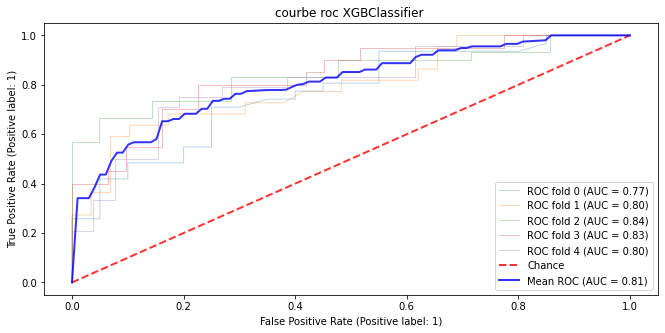

Accuracy: [0.64705882 0.66666667 0.78431373 0.76470588 0.7       ]
moy_accuracy: 0.71
precision: [0.7826087  0.5862069  0.88       0.66666667 0.65517241]
moy_precision: 0.71
sensibilité : [0.58064516 0.77272727 0.73333333 0.8        0.79166667]
moy_sensibilité: 0.74
spécificité : [0.75       0.5862069  0.85714286 0.74193548 0.61538462]
moy_spécificité: 0.71
MCC : [0.32442557 0.35893417 0.58132097 0.53009771 0.41203374]
MCC: 0.44
balanced_accuracy : [0.66532258 0.67946708 0.7952381  0.77096774 0.70352564]
balanced_accuracy: 0.72
roc_auc : [0.76935484 0.79545455 0.84444444 0.83225806 0.80448718]
roc_auc: 0.81
cohen_kappa_scorec : [0.30873494 0.34566038 0.57011494 0.52336449 0.40381558]
cohen_kappa_scorec: 0.43
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

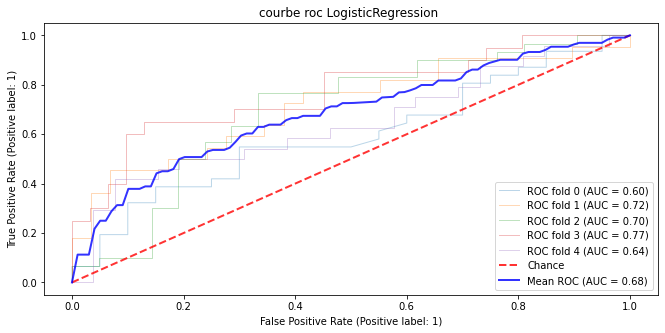

Accuracy: [0.56862745 0.60784314 0.68627451 0.74509804 0.64      ]
moy_accuracy: 0.65
precision: [0.71428571 0.53125    0.71875    0.68421053 0.6875    ]
moy_precision: 0.67
sensibilité : [0.48387097 0.77272727 0.76666667 0.65       0.45833333]
moy_sensibilité: 0.63
spécificité : [0.7        0.48275862 0.57142857 0.80645161 0.80769231]
moy_spécificité: 0.67
MCC : [0.18240584 0.26171311 0.34415774 0.46093406 0.28491568]
MCC: 0.31
balanced_accuracy : [0.59193548 0.62774295 0.66904762 0.72822581 0.63301282]
balanced_accuracy: 0.65
roc_auc : [0.59354839 0.71630094 0.6968254  0.77419355 0.65224359]
roc_auc: 0.69
cohen_kappa_scorec : [0.16888889 0.24219911 0.34299517 0.46053702 0.26948052]
cohen_kappa_scorec: 0.30
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

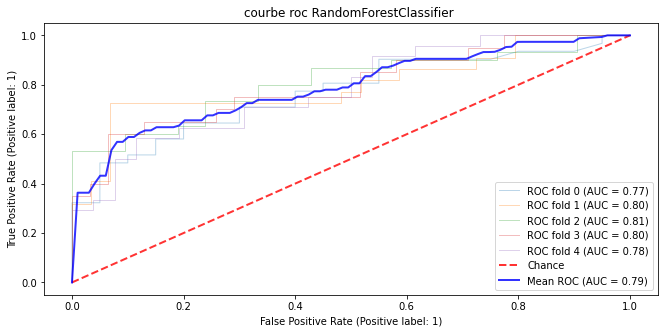

Accuracy: [0.66666667 0.64705882 0.7254902  0.7254902  0.66      ]
moy_accuracy: 0.68
precision: [0.85       0.57142857 0.80769231 0.63636364 0.62962963]
moy_precision: 0.70
sensibilité : [0.5483871  0.72727273 0.7        0.7        0.70833333]
moy_sensibilité: 0.68
spécificité : [0.85       0.5862069  0.76190476 0.74193548 0.61538462]
moy_spécificité: 0.71
MCC : [0.3983871  0.3120159  0.45474301 0.43565668 0.32449893]
MCC: 0.39
balanced_accuracy : [0.69919355 0.65673981 0.73095238 0.72096774 0.66185897]
balanced_accuracy: 0.69
roc_auc : [0.76774194 0.79780564 0.80793651 0.79677419 0.78205128]
roc_auc: 0.79
cohen_kappa_scorec : [0.36296841 0.30349014 0.44907407 0.43423138 0.32216906]
cohen_kappa_scorec: 0.37
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

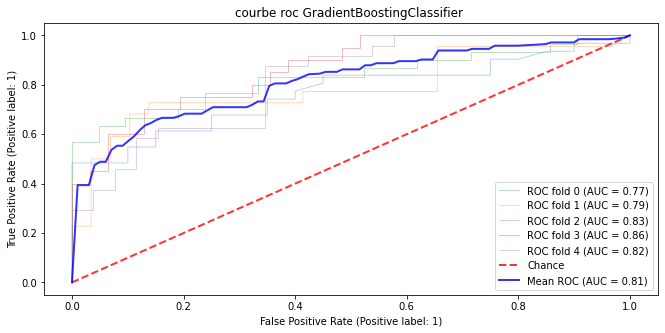

Accuracy: [0.70588235 0.70588235 0.74509804 0.76470588 0.68      ]
moy_accuracy: 0.72
precision: [0.86363636 0.64       0.79310345 0.7        0.65384615]
moy_precision: 0.73
sensibilité : [0.61290323 0.72727273 0.76666667 0.7        0.70833333]
moy_sensibilité: 0.70
spécificité : [0.85       0.68965517 0.71428571 0.80645161 0.65384615]
moy_spécificité: 0.74
MCC : [0.45632652 0.41306141 0.47792749 0.50645161 0.36217949]
MCC: 0.44
balanced_accuracy : [0.73145161 0.70846395 0.74047619 0.75322581 0.68108974]
balanced_accuracy: 0.72
roc_auc : [0.76774194 0.78605016 0.82857143 0.86290323 0.81891026]
roc_auc: 0.81
cohen_kappa_scorec : [0.42867812 0.41017733 0.47754137 0.50645161 0.36102236]
cohen_kappa_scorec: 0.44
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

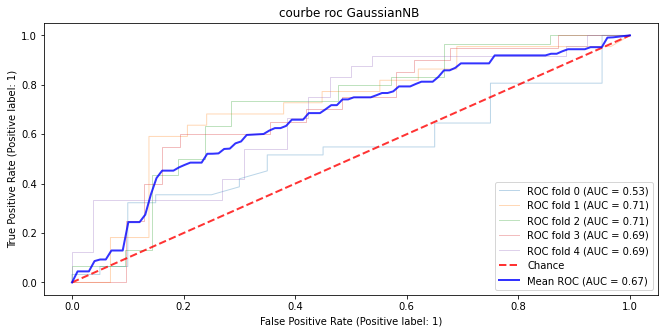

Accuracy: [0.56862745 0.49019608 0.66666667 0.58823529 0.66      ]
moy_accuracy: 0.59
precision: [0.61538462 0.45652174 0.65853659 0.48387097 0.60606061]
moy_precision: 0.56
sensibilité : [0.77419355 0.95454545 0.9        0.75       0.83333333]
moy_sensibilité: 0.84
spécificité : [0.25       0.13793103 0.33333333 0.48387097 0.5       ]
moy_spécificité: 0.34
MCC : [0.02784662 0.15402023 0.28923785 0.23387097 0.35155203]
MCC: 0.21
balanced_accuracy : [0.51209677 0.54623824 0.61666667 0.61693548 0.66666667]
balanced_accuracy: 0.59
roc_auc : [0.53387097 0.71238245 0.70952381 0.69354839 0.69070513]
roc_auc: 0.67
cohen_kappa_scorec : [0.02604167 0.08171745 0.25322997 0.21307862 0.328594  ]
cohen_kappa_scorec: 0.18
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

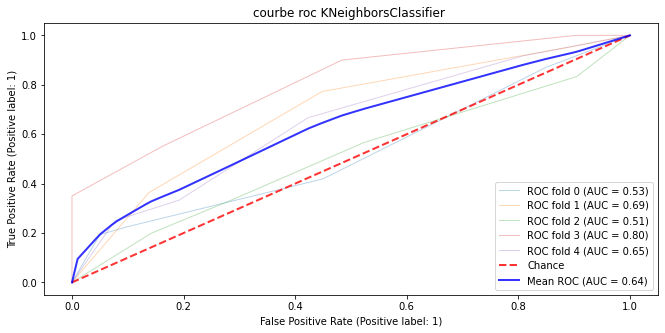

Accuracy: [0.49019608 0.64705882 0.49019608 0.7254902  0.58      ]
moy_accuracy: 0.59
precision: [0.77777778 0.59090909 0.625      0.6875     0.61538462]
moy_precision: 0.66
sensibilité : [0.22580645 0.59090909 0.33333333 0.55       0.33333333]
moy_sensibilité: 0.41
spécificité : [0.9        0.68965517 0.71428571 0.83870968 0.80769231]
moy_spécificité: 0.79
MCC : [0.16112126 0.28056426 0.05050763 0.40900365 0.16062674]
MCC: 0.21
balanced_accuracy : [0.56290323 0.64028213 0.52380952 0.69435484 0.57051282]
balanced_accuracy: 0.60
roc_auc : [0.5266129  0.68965517 0.51349206 0.8016129  0.6474359 ]
roc_auc: 0.64
cohen_kappa_scorec : [0.10526316 0.28056426 0.04329004 0.40301003 0.14355628]
cohen_kappa_scorec: 0.20
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

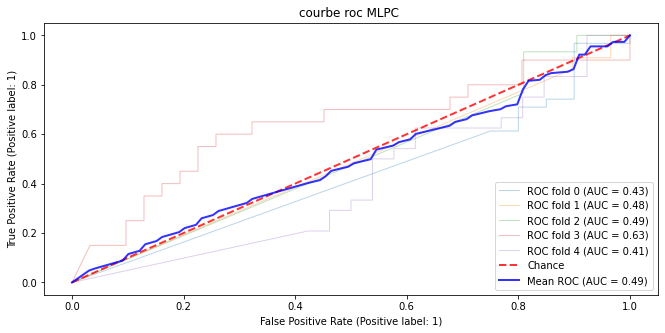

Accuracy: [0.39215686 0.58823529 0.39215686 0.39215686 0.48      ]
moy_accuracy: 0.45
precision: [0.63636364 0.42857143 0.58823529 0.5        0.69230769]
moy_precision: 0.57
sensibilité : [0.67741935 0.68181818 0.3        0.95       0.91666667]
moy_sensibilité: 0.71
spécificité : [0.         0.86206897 0.80952381 0.83870968 0.61538462]
moy_spécificité: 0.63
MCC : [0.13410744 0.20062696 0.36265926 0.19405363 0.06419407]
MCC: 0.19
balanced_accuracy : [0.53951613 0.48432602 0.46428571 0.67419355 0.5       ]
balanced_accuracy: 0.53
roc_auc : [0.45725806 0.5854232  0.62380952 0.42741935 0.56650641]
roc_auc: 0.53
cohen_kappa_scorec : [-0.02804557 -0.12207239  0.02761341 -0.230563   -0.03993344]
cohen_kappa_scorec: -0.08
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

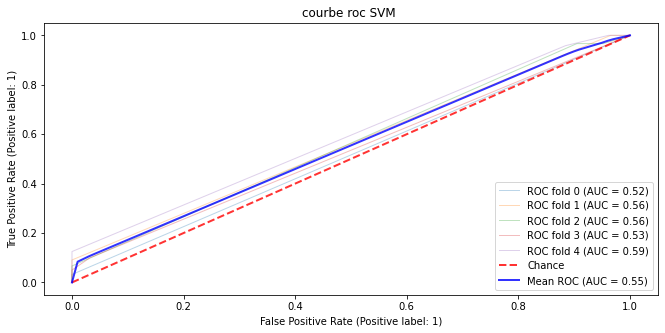

Accuracy: [0.41176471 0.45098039 0.45098039 0.39215686 0.52      ]
moy_accuracy: 0.45
precision: [1.         0.44       1.         0.39215686 0.5       ]
moy_precision: 0.67
sensibilité : [0.03225806 1.         0.06666667 1.         0.95833333]
moy_sensibilité: 0.61
spécificité : [1.         0.03448276 1.         0.         0.11538462]
moy_spécificité: 0.43
MCC : [0.11359237 0.12317635 0.16903085 0.         0.13575525]
MCC: 0.11
balanced_accuracy : [0.51612903 0.51724138 0.53333333 0.5        0.53685897]
balanced_accuracy: 0.52
roc_auc : [0.51612903 0.56112853 0.56031746 0.53467742 0.59294872]
roc_auc: 0.55
cohen_kappa_scorec : [0.02547771 0.0298913  0.05555556 0.         0.07120743]
cohen_kappa_scorec: 0.04


In [80]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe1, Y)):
         clf.fit( x_rfe1.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe1.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe1, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe1, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe1, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe1, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe1, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# logistique

In [46]:
rfecv2 = RFECV(LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),cv=StratifiedKFold(20))
rfecv2.fit(X,Y)
# check the support
rfecv2.get_support()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/l

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [47]:
# name wise features and count
feature_selected2 =  X.columns[rfecv2.get_support()]
feature_selected2

Index(['Amp3_IRM', 'VarT_ann_IRM', 'VarT_Cy_IRM', 'Ph3_IRM'], dtype='object')

In [48]:
 x_rfe2=X[feature_selected2]

In [49]:
 x_rfe2

,Amp3_IRM,VarT_ann_IRM,VarT_Cy_IRM,Ph3_IRM
0,50,47,49,231
1,50,73,73,49
2,50,73,73,49
3,50,48,48,106
4,10,18,18,64
...,...,...,...,...
249,20,78,80,241
250,10,92,92,146
251,30,84,88,173
252,10,67,71,247


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

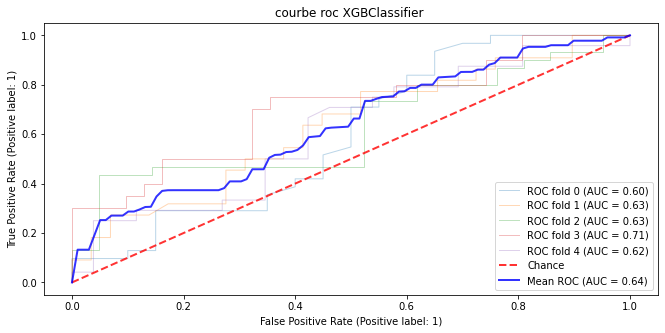

Accuracy: [0.52941176 0.54901961 0.49019608 0.54901961 0.62      ]
moy_accuracy: 0.55
precision: [0.64       0.48571429 0.57692308 0.45454545 0.5862069 ]
moy_precision: 0.55
sensibilité : [0.51612903 0.77272727 0.5        0.75       0.70833333]
moy_sensibilité: 0.65
spécificité : [0.55       0.37931034 0.47619048 0.41935484 0.53846154]
moy_spécificité: 0.47
MCC : [ 0.06458495  0.16228089 -0.02344036  0.17302156  0.24981573]
MCC: 0.13
balanced_accuracy : [0.53306452 0.57601881 0.48809524 0.58467742 0.62339744]
balanced_accuracy: 0.56
roc_auc : [0.6016129  0.63087774 0.63015873 0.70645161 0.6161859 ]
roc_auc: 0.64
cohen_kappa_scorec : [ 0.06278714  0.14191661 -0.02314815  0.15184382  0.24483307]
cohen_kappa_scorec: 0.12
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

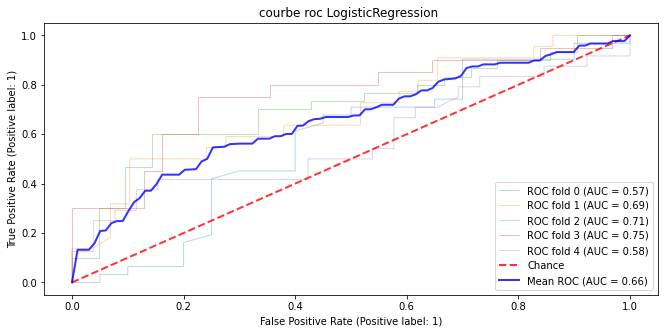

Accuracy: [0.60784314 0.56862745 0.66666667 0.70588235 0.52      ]
moy_accuracy: 0.61
precision: [0.68965517 0.5        0.72413793 0.6        0.5       ]
moy_precision: 0.60
sensibilité : [0.64516129 0.72727273 0.7        0.75       0.5       ]
moy_sensibilité: 0.66
spécificité : [0.55       0.44827586 0.61904762 0.67741935 0.53846154]
moy_spécificité: 0.57
MCC : [0.19238853 0.17982741 0.31704101 0.41743932 0.03846154]
MCC: 0.23
balanced_accuracy : [0.59758065 0.58777429 0.65952381 0.71370968 0.51923077]
balanced_accuracy: 0.62
roc_auc : [0.57016129 0.69043887 0.70952381 0.75483871 0.57612179]
roc_auc: 0.66
cohen_kappa_scorec : [0.19175911 0.16641902 0.31678487 0.40926641 0.03846154]
cohen_kappa_scorec: 0.22
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

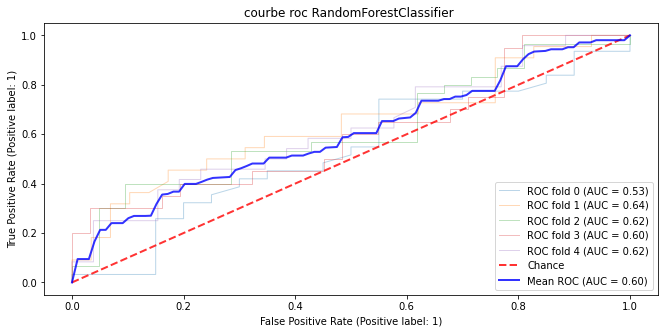

Accuracy: [0.50980392 0.56862745 0.56862745 0.56862745 0.58      ]
moy_accuracy: 0.56
precision: [0.71428571 0.5        0.7        0.45       0.57142857]
moy_precision: 0.59
sensibilité : [0.32258065 0.63636364 0.46666667 0.45       0.5       ]
moy_sensibilité: 0.48
spécificité : [0.8        0.51724138 0.71428571 0.64516129 0.65384615]
moy_spécificité: 0.67
MCC : [0.13410744 0.15288779 0.18240584 0.09516129 0.15572929]
MCC: 0.14
balanced_accuracy : [0.56129032 0.57680251 0.59047619 0.54758065 0.57692308]
balanced_accuracy: 0.57
roc_auc : [0.53467742 0.63714734 0.61746032 0.6        0.61939103]
roc_auc: 0.60
cohen_kappa_scorec : [0.10651717 0.14871017 0.16888889 0.09516129 0.15458937]
cohen_kappa_scorec: 0.13
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

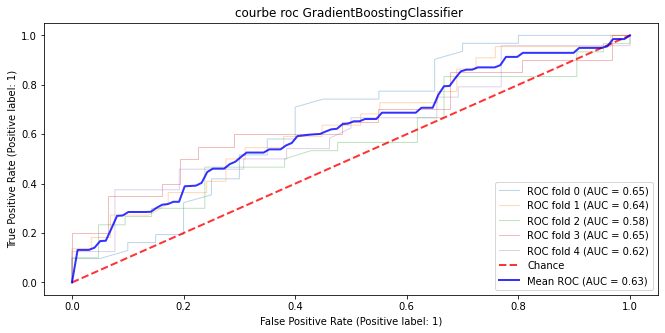

Accuracy: [0.50980392 0.56862745 0.54901961 0.54901961 0.56      ]
moy_accuracy: 0.55
precision: [0.71428571 0.5        0.65217391 0.4516129  0.54545455]
moy_precision: 0.57
sensibilité : [0.32258065 0.59090909 0.5        0.7        0.5       ]
moy_sensibilité: 0.52
spécificité : [0.8        0.55172414 0.61904762 0.4516129  0.61538462]
moy_spécificité: 0.61
MCC : [0.13410744 0.14131048 0.11774651 0.1516129  0.11613145]
MCC: 0.13
balanced_accuracy : [0.56129032 0.57131661 0.55952381 0.57580645 0.55769231]
balanced_accuracy: 0.57
roc_auc : [0.6516129  0.63714734 0.57539683 0.64677419 0.62259615]
roc_auc: 0.63
cohen_kappa_scorec : [0.10651717 0.13957055 0.11337868 0.13813373 0.11575563]
cohen_kappa_scorec: 0.12
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

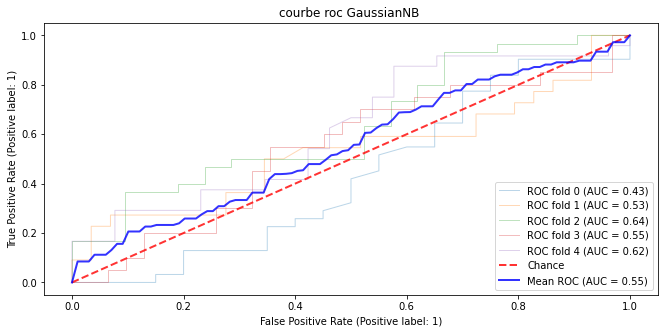

Accuracy: [0.49019608 0.43137255 0.56862745 0.52941176 0.6       ]
moy_accuracy: 0.52
precision: [0.5862069  0.41025641 0.63333333 0.4375     0.5625    ]
moy_precision: 0.53
sensibilité : [0.5483871  0.72727273 0.63333333 0.7        0.75      ]
moy_sensibilité: 0.67
spécificité : [0.4        0.20689655 0.47619048 0.41935484 0.46153846]
moy_spécificité: 0.39
MCC : [-0.05087961 -0.07686277  0.10952381  0.12052693  0.22017621]
MCC: 0.06
balanced_accuracy : [0.47419355 0.46708464 0.5547619  0.55967742 0.60576923]
balanced_accuracy: 0.53
roc_auc : [0.42983871 0.53056426 0.63650794 0.54516129 0.61939103]
roc_auc: 0.55
cohen_kappa_scorec : [-0.05071315 -0.06021505  0.10952381  0.10787172  0.20886076]
cohen_kappa_scorec: 0.06
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

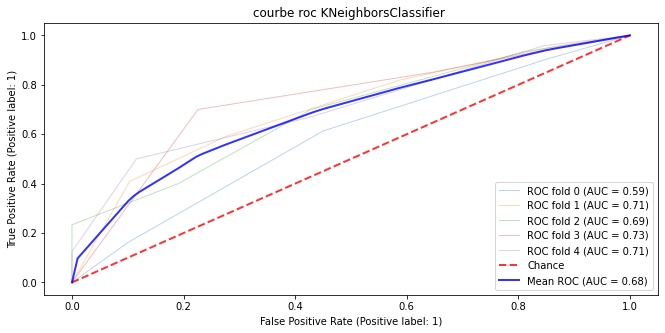

Accuracy: [0.49019608 0.66666667 0.56862745 0.74509804 0.7       ]
moy_accuracy: 0.63
precision: [0.69230769 0.61904762 0.75       0.66666667 0.8       ]
moy_precision: 0.71
sensibilité : [0.29032258 0.59090909 0.4        0.7        0.5       ]
moy_sensibilité: 0.50
spécificité : [0.8        0.72413793 0.80952381 0.77419355 0.88461538]
moy_spécificité: 0.80
MCC : [0.10118793 0.31704101 0.22223356 0.47041505 0.41931393]
MCC: 0.31
balanced_accuracy : [0.54516129 0.65752351 0.6047619  0.73709677 0.69230769]
balanced_accuracy: 0.65
roc_auc : [0.58951613 0.70532915 0.68650794 0.73306452 0.7099359 ]
roc_auc: 0.68
cohen_kappa_scorec : [0.07788595 0.31678487 0.19047619 0.47002398 0.3902439 ]
cohen_kappa_scorec: 0.29
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

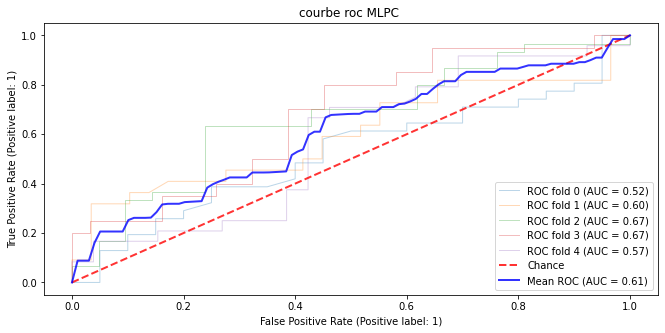

Accuracy: [0.60784314 0.56862745 0.56862745 0.64705882 0.56      ]
moy_accuracy: 0.59
precision: [0.69230769 0.52631579 0.65217391 0.35714286 0.5625    ]
moy_precision: 0.56
sensibilité : [0.41935484 0.86363636 0.56666667 0.85       0.25      ]
moy_sensibilité: 0.59
spécificité : [0.9        0.68965517 0.42857143 0.03225806 0.96153846]
moy_spécificité: 0.60
MCC : [0.07777138 0.17395014 0.24501524 0.01920061 0.19871795]
MCC: 0.14
balanced_accuracy : [0.64919355 0.61912226 0.65952381 0.61532258 0.59615385]
balanced_accuracy: 0.63
roc_auc : [0.61854839 0.51959248 0.53492063 0.71935484 0.58092949]
roc_auc: 0.59
cohen_kappa_scorec : [0.10526316 0.30136986 0.07272727 0.37519142 0.03400309]
cohen_kappa_scorec: 0.18
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

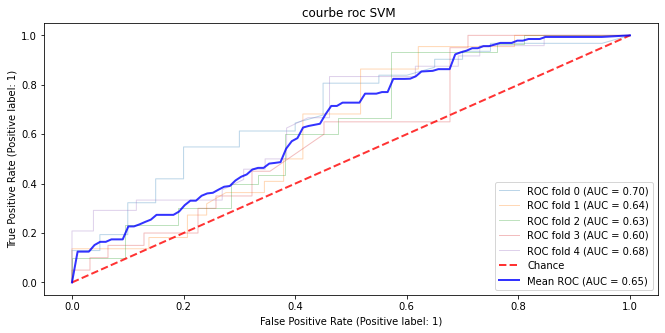

Accuracy: [0.52941176 0.58823529 0.47058824 0.56862745 0.68      ]
moy_accuracy: 0.57
precision: [0.76923077 0.51219512 0.6        0.475      0.625     ]
moy_precision: 0.60
sensibilité : [0.32258065 0.95454545 0.3        0.95       0.83333333]
moy_sensibilité: 0.67
spécificité : [0.85       0.31034483 0.71428571 0.32258065 0.53846154]
moy_spécificité: 0.55
MCC : [0.19334122 0.33043378 0.01543033 0.32356722 0.38697637]
MCC: 0.25
balanced_accuracy : [0.58629032 0.63244514 0.50714286 0.63629032 0.68589744]
balanced_accuracy: 0.61
roc_auc : [0.70241935 0.64028213 0.63492063 0.59919355 0.67948718]
roc_auc: 0.65
cohen_kappa_scorec : [0.1488178  0.23988644 0.01290323 0.23150685 0.36708861]
cohen_kappa_scorec: 0.20


In [79]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe2, Y)):
         clf.fit( x_rfe2.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe2.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe2, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe2, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe2, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe2, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe2, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# RandomForestClassifier

In [53]:
rfecv3 = RFECV(RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),cv=StratifiedKFold(20))
rfecv3.fit(X,Y)
# check the support
rfecv3.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [54]:
# name wise features and count
feature_selected3 =  X.columns[rfecv3.get_support()]
feature_selected3

Index(['Y_lat', 'Min_IRM', 'Max_IRM', 'Amp3_TempJ', 'Prob_R', 'Bio_Tsec_Moy',
       'Tmax_Fev', 'Tmax_Avril'],
      dtype='object')

In [55]:
 x_rfe3=X[feature_selected3]

In [56]:
 x_rfe3

,Y_lat,Min_IRM,Max_IRM,Amp3_TempJ,Prob_R,Bio_Tsec_Moy,Tmax_Fev,Tmax_Avril
0,23.794740,2690,3950,7,33,19.866667,21.799999,22.600000
1,27.132950,3350,4660,31,20,22.166667,22.600000,24.600000
2,27.132950,3350,4660,31,20,22.166667,22.600000,24.600000
3,27.157940,2930,4140,23,37,24.383334,22.600000,24.600000
4,27.157730,2350,3540,33,28,22.433334,22.799999,24.700001
...,...,...,...,...,...,...,...,...
249,35.766667,880,1950,5,21,23.433334,15.400000,18.900000
250,35.783333,1400,2690,1,23,23.433333,15.500000,18.700001
251,35.833333,1080,2430,6,10,23.416666,15.500000,18.900000
252,35.841944,620,1530,0,9,22.650000,17.100000,19.799999


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

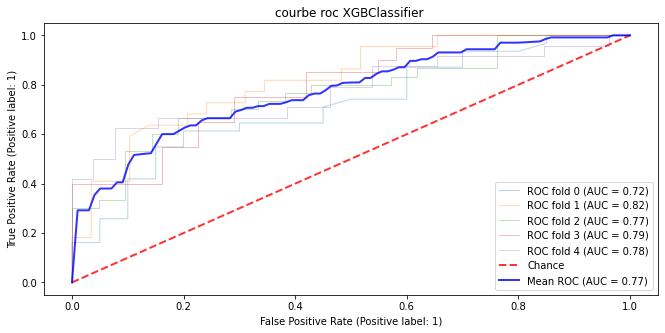

Accuracy: [0.62745098 0.68627451 0.7254902  0.64705882 0.64      ]
moy_accuracy: 0.67
precision: [0.7        0.6        0.83333333 0.53571429 0.60714286]
moy_precision: 0.66
sensibilité : [0.67741935 0.81818182 0.66666667 0.75       0.70833333]
moy_sensibilité: 0.72
spécificité : [0.55       0.5862069  0.80952381 0.58064516 0.57692308]
moy_spécificité: 0.62
MCC : [0.22560722 0.40694816 0.46953014 0.32442557 0.28710275]
MCC: 0.34
balanced_accuracy : [0.61370968 0.70219436 0.73809524 0.66532258 0.64262821]
balanced_accuracy: 0.67
roc_auc : [0.71612903 0.81896552 0.76825397 0.79354839 0.77884615]
roc_auc: 0.78
cohen_kappa_scorec : [0.22541966 0.38738739 0.456621   0.30873494 0.28343949]
cohen_kappa_scorec: 0.33
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

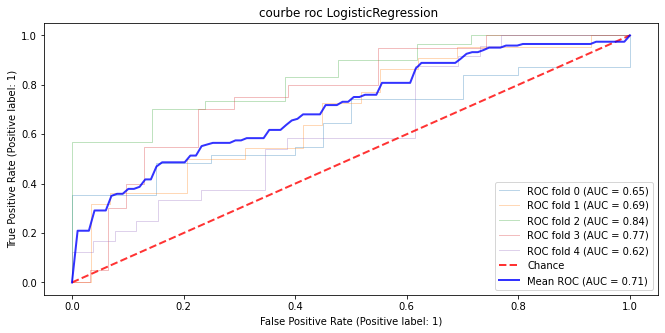

Accuracy: [0.60784314 0.58823529 0.7254902  0.7254902  0.56      ]
moy_accuracy: 0.64
precision: [0.78947368 0.51612903 0.78571429 0.63636364 0.55      ]
moy_precision: 0.66
sensibilité : [0.48387097 0.72727273 0.73333333 0.7        0.45833333]
moy_sensibilité: 0.62
spécificité : [0.8        0.48275862 0.71428571 0.74193548 0.65384615]
moy_spécificité: 0.68
MCC : [0.28665864 0.21305838 0.44272689 0.43565668 0.11440108]
MCC: 0.30
balanced_accuracy : [0.64193548 0.60501567 0.72380952 0.72096774 0.55608974]
balanced_accuracy: 0.65
roc_auc : [0.64516129 0.68965517 0.83809524 0.76612903 0.62339744]
roc_auc: 0.71
cohen_kappa_scorec : [0.25655977 0.20014937 0.44131455 0.43423138 0.11290323]
cohen_kappa_scorec: 0.29
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

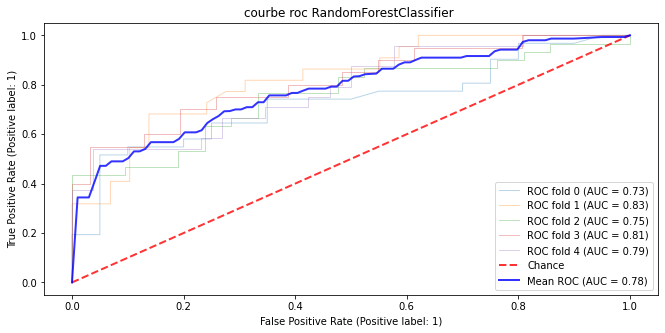

Accuracy: [0.66666667 0.7254902  0.66666667 0.74509804 0.66      ]
moy_accuracy: 0.69
precision: [0.81818182 0.65384615 0.7826087  0.66666667 0.61290323]
moy_precision: 0.71
sensibilité : [0.58064516 0.77272727 0.6        0.7        0.79166667]
moy_sensibilité: 0.69
spécificité : [0.8        0.68965517 0.76190476 0.77419355 0.53846154]
moy_spécificité: 0.71
MCC : [0.37523714 0.45809442 0.3579494  0.47041505 0.33979523]
MCC: 0.40
balanced_accuracy : [0.69032258 0.73119122 0.68095238 0.73709677 0.6650641 ]
balanced_accuracy: 0.70
roc_auc : [0.73064516 0.82523511 0.75396825 0.81451613 0.78685897]
roc_auc: 0.78
cohen_kappa_scorec : [0.35250187 0.45245399 0.3446712  0.47002398 0.32646593]
cohen_kappa_scorec: 0.39
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

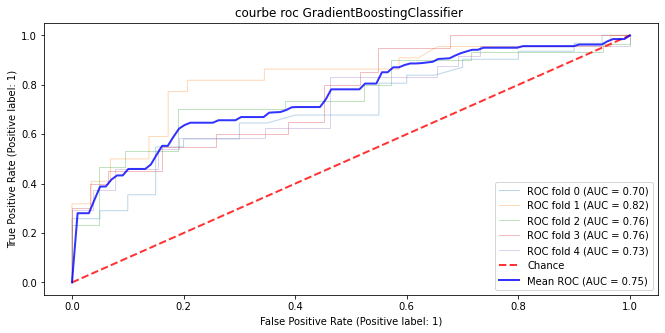

Accuracy: [0.66666667 0.78431373 0.70588235 0.58823529 0.58      ]
moy_accuracy: 0.67
precision: [0.76923077 0.72       0.82608696 0.48148148 0.55555556]
moy_precision: 0.67
sensibilité : [0.64516129 0.81818182 0.63333333 0.65       0.625     ]
moy_sensibilité: 0.67
spécificité : [0.7        0.75862069 0.80952381 0.5483871  0.53846154]
moy_spécificité: 0.67
MCC : [0.33710194 0.57145337 0.43801703 0.19405363 0.1638559 ]
MCC: 0.34
balanced_accuracy : [0.67258065 0.78840125 0.72142857 0.59919355 0.58173077]
balanced_accuracy: 0.67
roc_auc : [0.70483871 0.82210031 0.75714286 0.76290323 0.73076923]
roc_auc: 0.76
cohen_kappa_scorec : [0.33050193 0.56746338 0.42176871 0.18678815 0.16267943]
cohen_kappa_scorec: 0.33
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

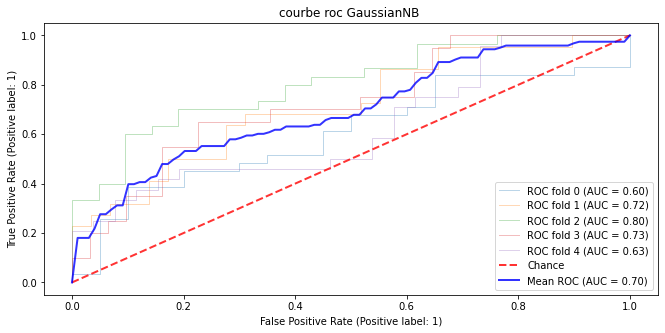

Accuracy: [0.54901961 0.58823529 0.70588235 0.68627451 0.58      ]
moy_accuracy: 0.62
precision: [0.75       0.51724138 0.85714286 0.59090909 0.57894737]
moy_precision: 0.66
sensibilité : [0.38709677 0.68181818 0.6        0.65       0.45833333]
moy_sensibilité: 0.56
spécificité : [0.8        0.51724138 0.85714286 0.70967742 0.69230769]
moy_spécificité: 0.72
MCC : [0.19686483 0.19905956 0.45714286 0.3545673  0.15505219]
MCC: 0.27
balanced_accuracy : [0.59354839 0.59952978 0.72857143 0.67983871 0.57532051]
balanced_accuracy: 0.64
roc_auc : [0.60483871 0.71630094 0.8047619  0.72580645 0.62820513]
roc_auc: 0.70
cohen_kappa_scorec : [0.16512456 0.19169811 0.4295302  0.35340729 0.15185784]
cohen_kappa_scorec: 0.26
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

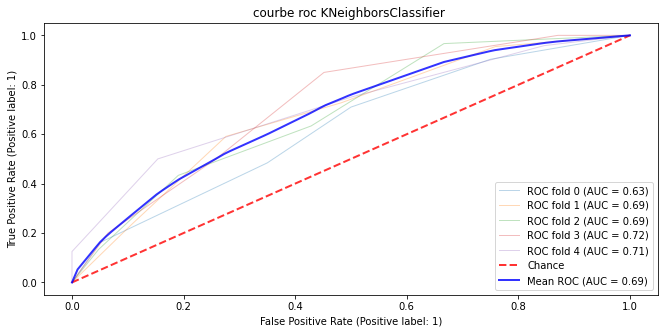

Accuracy: [0.54901961 0.66666667 0.58823529 0.64705882 0.68      ]
moy_accuracy: 0.63
precision: [0.68181818 0.61904762 0.76470588 0.55555556 0.75      ]
moy_precision: 0.67
sensibilité : [0.48387097 0.59090909 0.43333333 0.5        0.5       ]
moy_sensibilité: 0.50
spécificité : [0.65       0.72413793 0.80952381 0.74193548 0.84615385]
moy_spécificité: 0.75
MCC : [0.13196899 0.31704101 0.25354628 0.24717366 0.37073365]
MCC: 0.26
balanced_accuracy : [0.56693548 0.65752351 0.62142857 0.62096774 0.67307692]
balanced_accuracy: 0.63
roc_auc : [0.62983871 0.68652038 0.68888889 0.72177419 0.71073718]
roc_auc: 0.69
cohen_kappa_scorec : [0.12397311 0.31678487 0.22222222 0.24630542 0.35064935]
cohen_kappa_scorec: 0.25
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

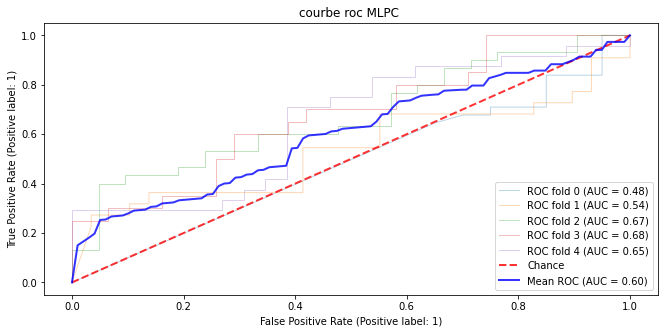

Accuracy: [0.60784314 0.56862745 0.50980392 0.39215686 0.54      ]
moy_accuracy: 0.52
precision: [0.60784314 0.         0.60465116 0.         0.        ]
moy_precision: 0.24
sensibilité : [0.   0.5  0.   0.15 1.  ]
moy_sensibilité: 0.33
spécificité : [0.45       0.         0.71428571 0.19354839 0.5       ]
moy_spécificité: 0.37
MCC : [ 0.12558938  0.          0.3286711   0.07912819 -0.1372527 ]
MCC: 0.08
balanced_accuracy : [0.49758065 0.5        0.5        0.5        0.58333333]
balanced_accuracy: 0.52
roc_auc : [0.54516129 0.43260188 0.60793651 0.56129032 0.66185897]
roc_auc: 0.56
cohen_kappa_scorec : [ 0.13324269  0.15913978  0.         -0.03879728 -0.25      ]
cohen_kappa_scorec: 0.00
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

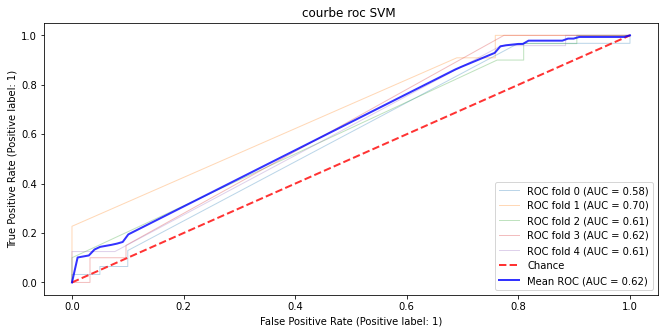

Accuracy: [0.39215686 0.50980392 0.45098039 0.43137255 0.56      ]
moy_accuracy: 0.47
precision: [0.5        0.46808511 1.         0.40816327 0.52272727]
moy_precision: 0.58
sensibilité : [0.03225806 1.         0.06666667 1.         0.95833333]
moy_sensibilité: 0.61
spécificité : [0.95       0.13793103 1.         0.06451613 0.19230769]
moy_spécificité: 0.47
MCC : [-0.04462557  0.25409341  0.16903085  0.16227481  0.23159736]
MCC: 0.15
balanced_accuracy : [0.49112903 0.56896552 0.53333333 0.53225806 0.57532051]
balanced_accuracy: 0.54
roc_auc : [0.58225806 0.69592476 0.61111111 0.62177419 0.61057692]
roc_auc: 0.62
cohen_kappa_scorec : [-0.01411161  0.12129566  0.05555556  0.05131495  0.14596273]
cohen_kappa_scorec: 0.07


In [78]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe3, Y)):
         clf.fit( x_rfe3.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe3.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe3, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe3, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe3, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe3, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe3, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# GradientBoosting

In [58]:
rfecv4 = RFECV(GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=1, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),cv=StratifiedKFold(20))
rfecv4.fit(X,Y)
# check the support
rfecv4.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False, False, False, False,  True,  True, False,  True,
        True, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
        True,  True, False, False,  True, False, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True, False,  True, False,  True, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,

In [71]:
# name wise features and count
feature_selected4 =  X.columns[rfecv4.get_support()]
feature_selected4

Index(['Ovins', 'Equides', 'ZoneAride', 'ZonePel', 'Arbrisseau', 'Pl_herb',
       'VegCul', 'ZoneUrbaine', 'Amp2_IRM', 'Amp3_IRM',
       ...
       'Vap_Juill', 'Vap_Nov', 'Vent_Janv', 'Vent_Fev', 'Vent_Mars',
       'Vent_Mai', 'Vent_Juin', 'Vent_Juill', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=128)

In [72]:
 x_rfe4=X[feature_selected4]

In [73]:
 x_rfe4

,Ovins,Equides,ZoneAride,ZonePel,Arbrisseau,Pl_herb,VegCul,ZoneUrbaine,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,Min_IRM,Ph1_IRM,Ph2_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,Max_TempJ,Ph3_TempJ,Moy_TempN,Amp1_TempN,Amp3_TempN,VarT_ann_TempN,VarT_bi_TempN,Min_TempN,Max_TempN,Ph3_TempN,Amp2_NDVI,VarT_ann_NDVI,VarT_bi_NDVI,Min_NDVI,Ph1_NDVI,Ph2_NDVI,Var_NDVI,Moy_EVI,...,Prec_Juill,Prec_Aout,Prec_Oct,Rad_Janv,Rad_Fev,Rad_Mars,Rad_Avril,Rad_Mai,Rad_Juin,Rad_Juill,Rad_Aout,Rad_Nov,Tmax_Janv,Tmax_Fev,Tmax_Mars,Tmax_Avril,Tmax_Mai,Tmax_Aout,Tmax_Oct,Tmin_Janv,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Sept,Tmin_Oct,Tmin_Nov,Vap_Mars,Vap_Juin,Vap_Juill,Vap_Nov,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Nov,Vent_Dec
0,0.000000,0.624435,97,3,0,0,0,0,110,50,47,2,0,2690,566,160,0,14905,96,83,0,53,15012,203,14436,102,5,63,12,14309,14561,151,4,2,1,1097,953,208,7,2906,...,1,3,3,14965,17773,21276,23683,24920,25088,23739,23115,15480,21.5,21.799999,22.700001,22.600000,23.200001,26.200001,26.000000,14.5,15.7,15.6,16.200001,17.299999,18.000000,19.200001,18.799999,17.299999,1.55,1.91,2.07,1.71,4.8,5.6,6.1,7.2,7.1,7.5,5.5,4.9
1,0.034352,0.040295,100,0,0,0,0,0,10,50,73,0,0,3350,581,33,0,15360,312,126,1,87,15609,88,14516,176,18,72,7,14311,14705,104,2,13,1,1076,137,240,1,2596,...,0,0,3,13864,16620,19997,22794,24082,24129,23135,22648,13866,21.9,22.600000,24.000000,24.600000,25.500000,29.700001,27.600000,12.0,14.2,14.7,15.700000,17.299999,18.799999,19.400000,17.799999,15.300000,1.42,1.84,2.03,1.60,4.2,4.1,4.8,5.7,6.4,5.9,3.7,3.8
2,0.034352,0.040295,100,0,0,0,0,0,10,50,73,0,0,3350,581,33,0,15360,312,126,1,87,15609,88,14516,176,18,72,7,14311,14705,104,2,13,1,1076,137,240,1,2596,...,0,0,3,13864,16620,19997,22794,24082,24129,23135,22648,13866,21.9,22.600000,24.000000,24.600000,25.500000,29.700001,27.600000,12.0,14.2,14.7,15.700000,17.299999,18.799999,19.400000,17.799999,15.300000,1.42,1.84,2.03,1.60,4.2,4.1,4.8,5.7,6.4,5.9,3.7,3.8
3,0.000000,0.269410,100,0,0,0,0,0,40,50,48,0,0,2930,600,214,0,15264,306,120,0,85,15502,78,14512,160,21,66,9,14315,14690,109,1,8,0,1086,1047,367,1,2578,...,0,0,3,13845,16659,20010,22772,24019,24050,23055,22569,13820,21.9,22.600000,24.000000,24.600000,25.500000,29.700001,27.600000,12.3,14.4,15.0,16.000000,17.600000,19.000000,19.600000,18.100000,15.500000,1.43,1.86,2.04,1.61,4.2,4.5,5.1,5.5,6.2,6.2,3.7,3.9
4,0.000000,0.379107,100,0,0,0,0,0,70,10,18,0,0,2350,577,185,10,15310,295,115,1,77,15560,92,14526,182,14,72,7,14309,14719,112,4,1,0,1049,474,213,20,2190,...,0,0,3,13863,16615,19999,22726,24002,23963,23035,22619,13811,22.0,22.799999,24.100000,24.700001,25.700001,29.900000,27.799999,12.4,14.6,15.2,16.100000,17.700001,19.100000,19.700001,18.200001,15.600000,1.44,1.88,2.07,1.63,4.2,4.2,5.0,5.4,5.7,6.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,15.116930,0.698221,0,0,13,0,39,0,70,20,78,2,0,880,647,153,0,14903,543,78,0,94,15505,325,14347,294,1,92,2,14078,14675,311,26,52,3,1389,140,483,100,5253,...,1,3,59,9145,11971,15330,19973,23341,25791,26073,23626,9869,15.2,15.400000,17.299999,18.900000,21.200001,27.700001,22.100000,9.4,11.5,13.1,15.400000,18.500000,21.200001,19.700001,16.100000,12.800000,1.20,1.74,1.96,1.35,4.1,4.6,4.6,4.1,3.9,3.9,4.0,4.2
250,0.000000,1.725019,0,0,0,0,0,100,0,10,92,0,0,1400,593,254,0,14838,478,42,0,95,15319,388,14419,308,4,91,1,14120,14743,382,10,51,5,1193,134,500,11,3460,...,1,2,76,8985,11863,15445,20162,23582,26184,27092,24794,9792,14.5,15.500000,17.299999,18.700001,20.900000,27.299999,22.400000,9.6,12.4,13.9,16.000000,19.400000,21.200001,20.100000,16.799999,13.400000,1.21,1.73,1.97,1.37,3.7,4.3,4.6,3.8,3.7,3.7,3.8,4.0
251,15.054404,0.991284,0,0,2

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

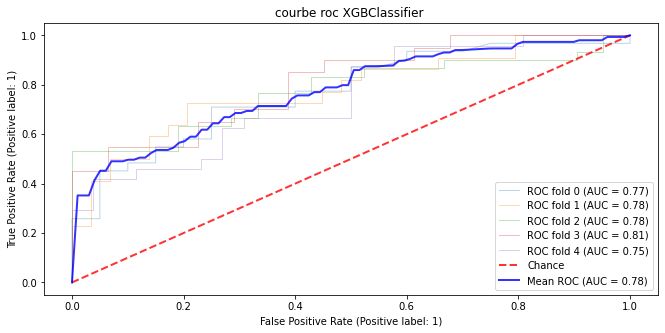

Accuracy: [0.66666667 0.62745098 0.68627451 0.64705882 0.6       ]
moy_accuracy: 0.65
precision: [0.79166667 0.5483871  0.75       0.53846154 0.56666667]
moy_precision: 0.64
sensibilité : [0.61290323 0.77272727 0.7        0.7        0.70833333]
moy_sensibilité: 0.70
spécificité : [0.75       0.51724138 0.66666667 0.61290323 0.5       ]
moy_spécificité: 0.61
MCC : [0.35497615 0.29414776 0.36265926 0.30559708 0.21245915]
MCC: 0.31
balanced_accuracy : [0.68145161 0.64498433 0.68333333 0.65645161 0.60416667]
balanced_accuracy: 0.65
roc_auc : [0.77096774 0.78056426 0.77619048 0.81129032 0.74839744]
roc_auc: 0.78
cohen_kappa_scorec : [0.34168565 0.27632562 0.36150235 0.29709035 0.20634921]
cohen_kappa_scorec: 0.30
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

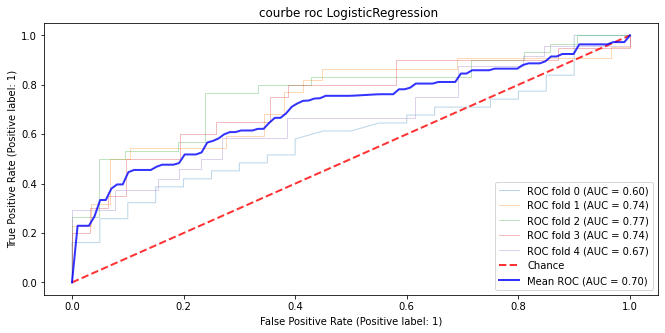

Accuracy: [0.56862745 0.64705882 0.76470588 0.68627451 0.6       ]
moy_accuracy: 0.65
precision: [0.71428571 0.5625     0.8        0.625      0.61111111]
moy_precision: 0.66
sensibilité : [0.48387097 0.81818182 0.8        0.5        0.45833333]
moy_sensibilité: 0.61
spécificité : [0.7        0.51724138 0.71428571 0.80645161 0.73076923]
moy_spécificité: 0.69
MCC : [0.18240584 0.3435988  0.51428571 0.32245101 0.19682419]
MCC: 0.31
balanced_accuracy : [0.59193548 0.6677116  0.75714286 0.65322581 0.59455128]
balanced_accuracy: 0.65
roc_auc : [0.61129032 0.75548589 0.77619048 0.68870968 0.67307692]
roc_auc: 0.70
cohen_kappa_scorec : [0.16888889 0.3179792  0.51428571 0.31772575 0.19093851]
cohen_kappa_scorec: 0.30
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

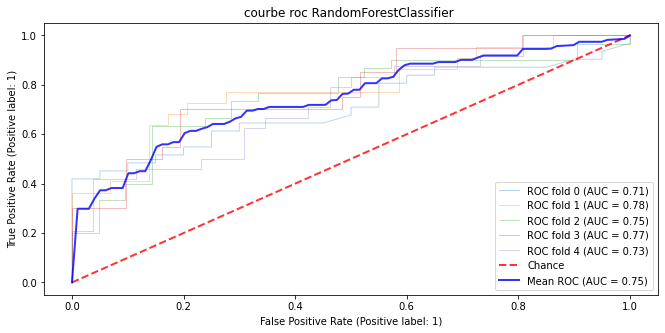

Accuracy: [0.62745098 0.62745098 0.68627451 0.70588235 0.66      ]
moy_accuracy: 0.66
precision: [0.83333333 0.5483871  0.79166667 0.60869565 0.64      ]
moy_precision: 0.68
sensibilité : [0.48387097 0.77272727 0.63333333 0.7        0.66666667]
moy_sensibilité: 0.65
spécificité : [0.85       0.51724138 0.76190476 0.70967742 0.65384615]
moy_spécificité: 0.70
MCC : [0.34109965 0.29414776 0.38971002 0.4019712  0.32025631]
MCC: 0.35
balanced_accuracy : [0.66693548 0.64498433 0.69761905 0.70483871 0.66025641]
balanced_accuracy: 0.67
roc_auc : [0.71048387 0.77899687 0.75396825 0.76935484 0.72596154]
roc_auc: 0.75
cohen_kappa_scorec : [0.29934924 0.27632562 0.37899543 0.39905734 0.32      ]
cohen_kappa_scorec: 0.33
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

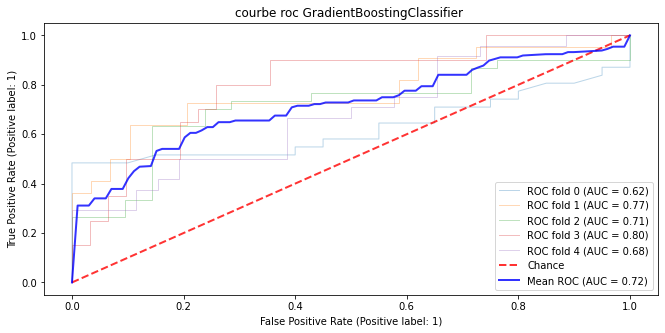

Accuracy: [0.62745098 0.66666667 0.68627451 0.74509804 0.6       ]
moy_accuracy: 0.67
precision: [0.8        0.59259259 0.79166667 0.65217391 0.57142857]
moy_precision: 0.68
sensibilité : [0.51612903 0.72727273 0.63333333 0.75       0.66666667]
moy_sensibilité: 0.66
spécificité : [0.8        0.62068966 0.76190476 0.74193548 0.53846154]
moy_spécificité: 0.69
MCC : [0.31612903 0.34526705 0.38971002 0.48268195 0.20645591]
MCC: 0.35
balanced_accuracy : [0.65806452 0.67398119 0.69761905 0.74596774 0.6025641 ]
balanced_accuracy: 0.68
roc_auc : [0.625      0.77272727 0.71428571 0.8        0.68269231]
roc_auc: 0.72
cohen_kappa_scorec : [0.28802351 0.33867277 0.37899543 0.47918303 0.20382166]
cohen_kappa_scorec: 0.34
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

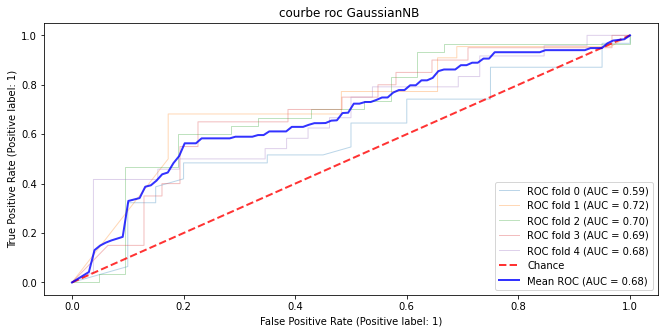

Accuracy: [0.58823529 0.58823529 0.60784314 0.64705882 0.6       ]
moy_accuracy: 0.61
precision: [0.66666667 0.51219512 0.65625    0.53846154 0.58333333]
moy_precision: 0.59
sensibilité : [0.64516129 0.95454545 0.7        0.7        0.58333333]
moy_sensibilité: 0.72
spécificité : [0.5        0.31034483 0.47619048 0.61290323 0.61538462]
moy_spécificité: 0.50
MCC : [0.14400461 0.33043378 0.17934981 0.30559708 0.19871795]
MCC: 0.23
balanced_accuracy : [0.57258065 0.63244514 0.58809524 0.65645161 0.59935897]
balanced_accuracy: 0.61
roc_auc : [0.58870968 0.71630094 0.7047619  0.69354839 0.67548077]
roc_auc: 0.68
cohen_kappa_scorec : [0.14388489 0.23988644 0.17874396 0.29709035 0.19871795]
cohen_kappa_scorec: 0.21
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

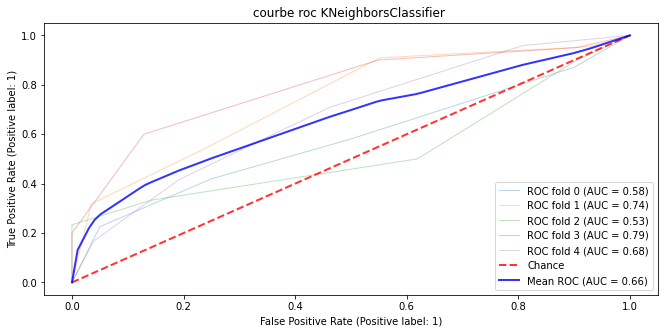

Accuracy: [0.54901961 0.66666667 0.54901961 0.76470588 0.62      ]
moy_accuracy: 0.63
precision: [0.72222222 0.63157895 0.76923077 0.75       0.66666667]
moy_precision: 0.71
sensibilité : [0.41935484 0.54545455 0.33333333 0.6        0.41666667]
moy_sensibilité: 0.46
spécificité : [0.75       0.75862069 0.85714286 0.87096774 0.80769231]
moy_spécificité: 0.81
MCC : [0.17302156 0.31148677 0.21510351 0.49555629 0.2445998 ]
MCC: 0.29
balanced_accuracy : [0.58467742 0.65203762 0.5952381  0.73548387 0.61217949]
balanced_accuracy: 0.64
roc_auc : [0.57903226 0.74137931 0.52936508 0.78870968 0.67628205]
roc_auc: 0.66
cohen_kappa_scorec : [0.15184382 0.30916335 0.16985138 0.48829431 0.22764228]
cohen_kappa_scorec: 0.27
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

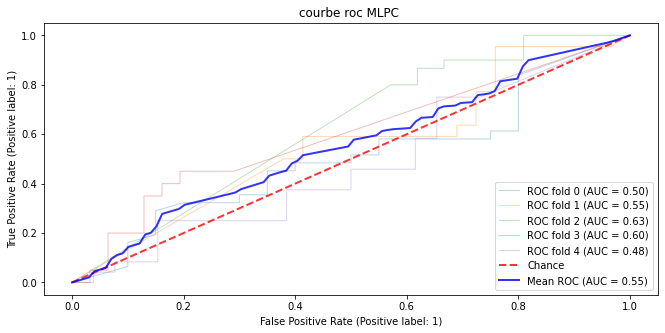

Accuracy: [0.43137255 0.47058824 0.45098039 0.45098039 0.62      ]
moy_accuracy: 0.48
precision: [0.66666667 0.5        0.75       0.3877551  0.75      ]
moy_precision: 0.61
sensibilité : [0.29032258 0.72727273 0.83333333 0.5        0.70833333]
moy_sensibilité: 0.61
spécificité : [0.9        0.96551724 0.         0.90322581 0.53846154]
moy_spécificité: 0.66
MCC : [-0.11359237  0.23071708  0.28443678  0.27347792  0.02190365]
MCC: 0.14
balanced_accuracy : [0.49193548 0.46081505 0.6547619  0.56370968 0.55769231]
balanced_accuracy: 0.55
roc_auc : [0.38467742 0.57601881 0.48730159 0.49193548 0.46394231]
roc_auc: 0.48
cohen_kappa_scorec : [ 0.09108911 -0.10455564 -0.09819121 -0.1516129   0.        ]
cohen_kappa_scorec: -0.05
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

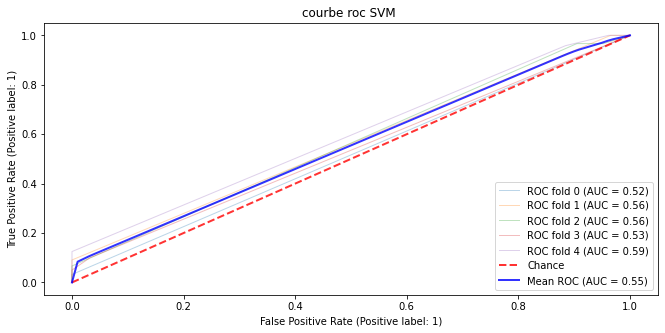

Accuracy: [0.41176471 0.45098039 0.45098039 0.39215686 0.52      ]
moy_accuracy: 0.45
precision: [1.         0.44       1.         0.39215686 0.5       ]
moy_precision: 0.67
sensibilité : [0.03225806 1.         0.06666667 1.         0.95833333]
moy_sensibilité: 0.61
spécificité : [1.         0.03448276 1.         0.         0.11538462]
moy_spécificité: 0.43
MCC : [0.11359237 0.12317635 0.16903085 0.         0.13575525]
MCC: 0.11
balanced_accuracy : [0.51612903 0.51724138 0.53333333 0.5        0.53685897]
balanced_accuracy: 0.52
roc_auc : [0.51612903 0.56112853 0.56031746 0.53467742 0.59294872]
roc_auc: 0.55
cohen_kappa_scorec : [0.02547771 0.0298913  0.05555556 0.         0.07120743]
cohen_kappa_scorec: 0.04


In [77]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe4, Y)):
         clf.fit( x_rfe4.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe4.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe4, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe4, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe4, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe4, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe4, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))